In [3]:
#DS Basics
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

In [5]:
#SKLearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [6]:
#helpers
%matplotlib inline

In [7]:
data=pd.read_csv('Demographic_Data_Clean.csv')

In [8]:
data.head(0)

,in-store,age,items,amount,region,trantype,regionname,agerange


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79979 entries, 0 to 79978
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   in-store    79979 non-null  int64  
 1   age         79979 non-null  int64  
 2   items       79979 non-null  int64  
 3   amount      79979 non-null  float64
 4   region      79979 non-null  int64  
 5   trantype    79979 non-null  object 
 6   regionname  79979 non-null  object 
 7   agerange    79979 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 4.9+ MB


In [10]:
data[0:3] # Select rows 0, 1, 2 (row 3 is not selected)

,in-store,age,items,amount,region,trantype,regionname,agerange
0,0,37,4,281.03,2,online,South,30-39
1,0,35,2,219.51,2,online,South,30-39
2,1,45,3,1525.70,4,in-store,West,40-49


In [11]:
#features
X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [12]:
#dependent variable
y = data['region']

In [14]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [15]:
#Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

In [16]:
#Predictions
preds = model.predict(X_test)

In [18]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.39      0.38      0.39      4838
           2       0.91      0.90      0.91      5979
           3       0.37      0.38      0.38      5391
           4       0.53      0.53      0.53      7786

    accuracy                           0.56     23994
   macro avg       0.55      0.55      0.55     23994
weighted avg       0.56      0.56      0.56     23994



In [19]:
from sklearn.tree import plot_tree

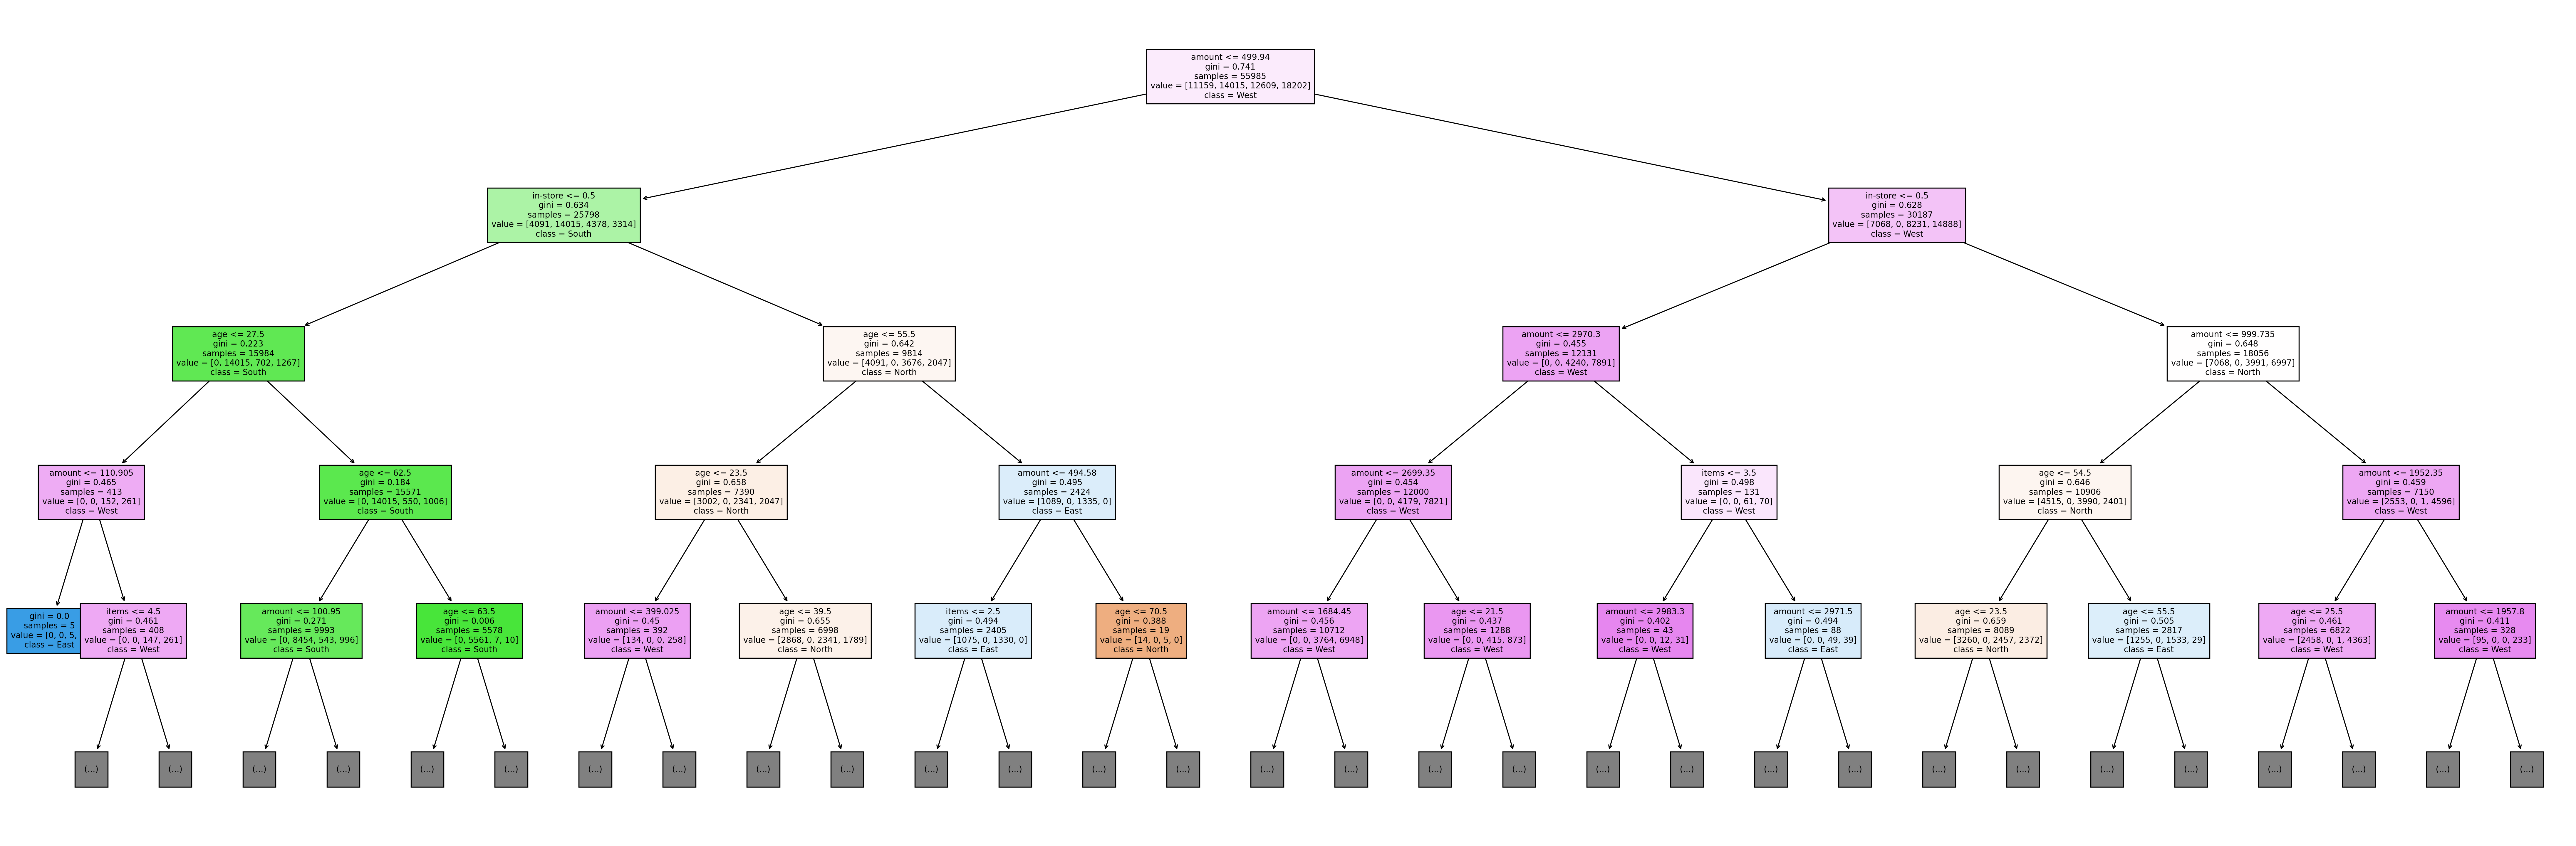

In [33]:
fig = plt.figure(figsize=(45,15),dpi=250)
tree = plot_tree(model, fontsize=8, feature_names=X.columns, class_names=['North','South','East','West'], max_depth=4, filled=True)